<a href="https://colab.research.google.com/github/AnmolMohak/Placement_related_Projects/blob/main/Placement_project_Bigmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing libraries **

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



**Loading Dataset.**

In [2]:
# converting in Pandas data frame.
df=pd.read_csv('/content/Train.csv')

In [3]:
# Item_Identifier: eatables or non-eatable
# Item_Visibility: area occupied by mango/ display area of all product.
# outlet identifier= Unique Id for each Outlet.
# Item MRP : in USD.
# Outlet location type: Tier1(Population> 1lakh)
# Outlet type: Supermarket_1()
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [50]:
# number of rows and coloumn
row,column =df.shape
print(f"Tota number of row is : {row}")
print(f"Tota number of coloumn is : {column}")

Tota number of row is : 8523
Tota number of coloumn is : 12


In [51]:
# Missing values and datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [52]:
# categorical feature name
categorical_feature=df.select_dtypes(include=['object'])
print(categorical_feature.columns)

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')


In [53]:

# numrical features name
numrical_feature= df.select_dtypes(exclude=['object'])
print(numrical_feature.columns)

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')


In [54]:
# checking Missing Values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#Handlling Numerical Missing values

If skewness is -1 to +1 or Kurtosis is -2 to +2 then data can be considered as Normally distributeda and MEAN can be used to replace NaN values.

 Also check for BOX Plot

<ipython-input-55-2d55f29c148d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Item_Weight)


<Axes: xlabel='Item_Weight', ylabel='Density'>

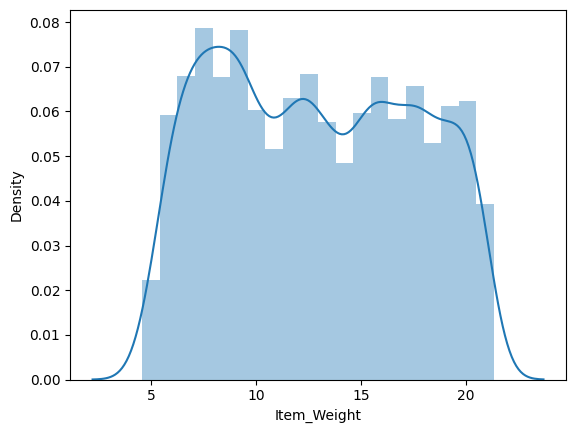

In [55]:
#plt.hist(df.Item_Weight)
# since using matplot I am not able to get a curve so  using Seaborn Lib.
sns.distplot(df.Item_Weight)

In [56]:
# to check Skewness
from scipy.stats import skew
df.skew()


<ipython-input-56-7b7b40c17a0d>:3: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

<Axes: >

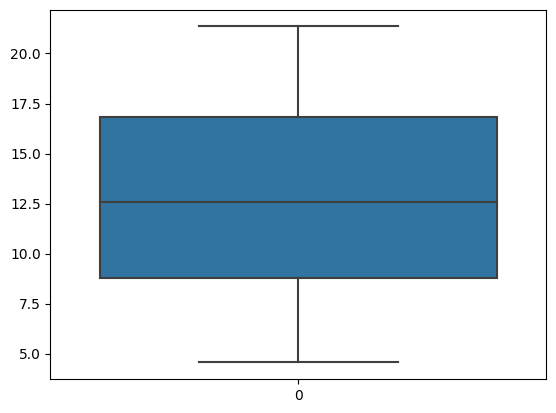

In [57]:
# to draw boxplot
sns.boxplot(df.Item_Weight)
# no outliers

In [58]:
# Item_weight : Replacing with mean value
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

In [59]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#Handelling string type missing values

1. one way to just check mode to coloumn and replace with that value.

2. another way is to make a correlation with other feature and then fill.

In [79]:
# second way
mode_wrt_outlet_type=df.pivot_table(values='Outlet_Size',columns='Outlet_Type',)
print(mode_wrt_outlet_type)

Empty DataFrame
Columns: []
Index: []


<ipython-input-79-967a44b0d2e6>:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  mode_wrt_outlet_type=df.pivot_table(values='Outlet_Size',columns='Outlet_Type')
